## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [5]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "無"

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [11]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0816 15:23:02.695426  7456 deprecation_wrapper.py:119] From C:\Users\asus\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0816 15:23:02.733301  7456 deprecation_wrapper.py:119] From C:\Users\asus\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0816 15:23:03.203096  7456 deprecation_wrapper.py:119] From C:\Users\asus\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0816 15:23:03.208272  7456 deprecation_wrapper.py:119] From C:\Users\asus\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 15:23:03.233106  7456 depr

Experiment with LR = 0.100000


W0816 15:23:03.842689  7456 deprecation_wrapper.py:119] From C:\Users\asus\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0816 15:23:04.581160  7456 deprecation.py:323] From C:\Users\asus\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 339us/step - loss: 2.0301 - acc: 0.2513 - val_loss: 1.9192 - val_acc: 0.2955
Epoch 2/50
50000/50000 [==============================] - 15s 300us/step - loss: 1.7951 - acc: 0.3520 - val_loss: 1.8387 - val_acc: 0.3575
Epoch 3/50
50000/50000 [==============================] - 15s 297us/step - loss: 1.7611 - acc: 0.3681 - val_loss: 1.6908 - val_acc: 0.3925
Epoch 4/50
50000/50000 [==============================] - 15s 304us/step - loss: 1.6922 - acc: 0.3938 - val_loss: 1.7003 - val_acc: 0.3926
Epoch 5/50
50000/50000 [==============================] - 15s 294us/step - loss: 1.6590 - acc: 0.4076 - val_loss: 1.7155 - val_acc: 0.3931
Epoch 6/50
50000/50000 [==============================] - 16s 316us/step - loss: 1.6596 - acc: 0.4077 - val_loss: 1.6759 - val_acc: 0.4013
Epoch 7/50
50000/50000 [==============================] - 15s 296us/step - loss: 1.6353 - acc: 0.4189 - val_loss: 1.

50000/50000 [==============================] - 15s 303us/step - loss: 1.8283 - acc: 0.3456 - val_loss: 1.7524 - val_acc: 0.3725
Epoch 2/50
50000/50000 [==============================] - 14s 276us/step - loss: 1.6045 - acc: 0.4309 - val_loss: 1.5520 - val_acc: 0.4483
Epoch 3/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.5119 - acc: 0.4633 - val_loss: 1.5858 - val_acc: 0.4189
Epoch 4/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.4452 - acc: 0.4880 - val_loss: 1.4720 - val_acc: 0.4824
Epoch 5/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.4033 - acc: 0.5007 - val_loss: 1.4390 - val_acc: 0.4883
Epoch 6/50
50000/50000 [==============================] - 14s 288us/step - loss: 1.3603 - acc: 0.5177 - val_loss: 1.4305 - val_acc: 0.4937
Epoch 7/50
50000/50000 [==============================] - 15s 292us/step - loss: 1.3257 - acc: 0.5319 - val_loss: 1.4104 - val_acc: 0.4990
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.8194 - acc: 0.3650 - val_loss: 1.7763 - val_acc: 0.3796
Epoch 3/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.7300 - acc: 0.3959 - val_loss: 1.6982 - val_acc: 0.4054
Epoch 4/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.6706 - acc: 0.4170 - val_loss: 1.6458 - val_acc: 0.4223
Epoch 5/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.6215 - acc: 0.4357 - val_loss: 1.6243 - val_acc: 0.4313
Epoch 6/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.5813 - acc: 0.4467 - val_loss: 1.5758 - val_acc: 0.4449
Epoch 7/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.5464 - acc: 0.4577 - val_loss: 1.5467 - val_acc: 0.4582
Epoch 8/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.5155 - acc: 0.4689 - val_loss: 1.5167 - val_acc: 0.4640
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 10s 209us/step - loss: 2.0392 - acc: 0.2734 - val_loss: 2.0096 - val_acc: 0.2921
Epoch 4/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.9847 - acc: 0.2996 - val_loss: 1.9638 - val_acc: 0.3121
Epoch 5/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.9446 - acc: 0.3184 - val_loss: 1.9283 - val_acc: 0.3281
Epoch 6/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.9133 - acc: 0.3294 - val_loss: 1.9006 - val_acc: 0.3381
Epoch 7/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.8876 - acc: 0.3407 - val_loss: 1.8787 - val_acc: 0.3426
Epoch 8/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.8664 - acc: 0.3465 - val_loss: 1.8584 - val_acc: 0.3518
Epoch 9/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.8476 - acc: 0.3559 - val_loss: 1.8421 - val_acc: 0.3573
Epoch 10/50
50000/50000 [==

50000/50000 [==============================] - 11s 210us/step - loss: 2.2651 - acc: 0.1718 - val_loss: 2.2545 - val_acc: 0.1867
Epoch 4/50
50000/50000 [==============================] - 10s 201us/step - loss: 2.2464 - acc: 0.1906 - val_loss: 2.2372 - val_acc: 0.2017
Epoch 5/50
50000/50000 [==============================] - 10s 201us/step - loss: 2.2299 - acc: 0.2038 - val_loss: 2.2216 - val_acc: 0.2151
Epoch 6/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.2148 - acc: 0.2150 - val_loss: 2.2072 - val_acc: 0.2271
Epoch 7/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.2008 - acc: 0.2255 - val_loss: 2.1937 - val_acc: 0.2341
Epoch 8/50
50000/50000 [==============================] - 10s 204us/step - loss: 2.1877 - acc: 0.2333 - val_loss: 2.1810 - val_acc: 0.2441
Epoch 9/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.1753 - acc: 0.2423 - val_loss: 2.1688 - val_acc: 0.2500
Epoch 10/50
50000/50000 [=============

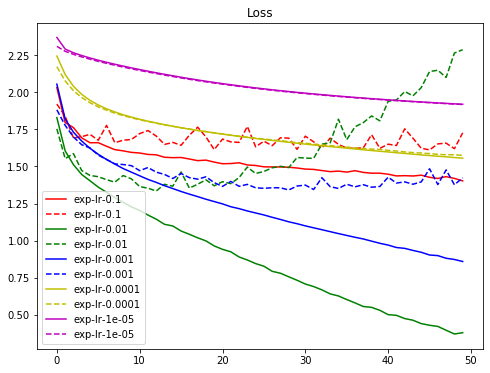

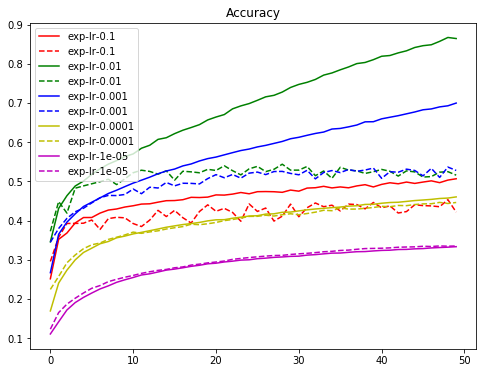

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()